# Time Series 

* 시간에 따른 연속형 변수의 예측 및 Trend 파악 
    - 여기서 시간은 특정 간격을 가진 주기 ; Lag
    - Lag에서 Data point의 특성을 찾는것 


* 시계열 분석 모형 
    - **일변량 정상시계열**
        - ARIMA
        - 지수평활법
    
    - **다변량 시계열**
        - 전이함수모형


* 시계열 패턴  
    - 추세 (Trend)
    - 계절성 (Seasonality)
    - 주기 (Cycle) : 
    - 잡음 (Noise) : 시간에 따라 독립적인 데이터 / White Noise : 통계적, 기술적 분석이 가능한 정도의 Noise 

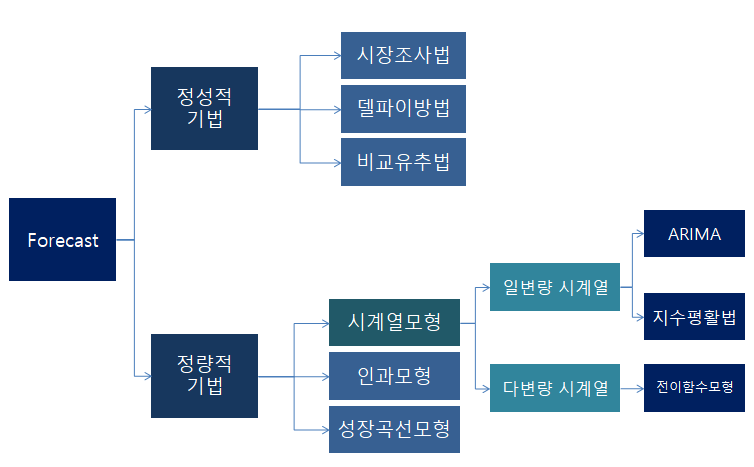

**ARIMA**

* ARIMA 사용 시기 및 조건
    - 단기예측에 적합
    - 계절적 변동요인 (주기적 변동요인)
    - 표본의 크기가 최소 50개 이상 
    - 정상적(Stationary)자료에 적용 가능 
        - 평균이 증가/감소 -> 차분(Difference)을 실시
        - 분산이 증가/감소 -> Lag 변환
        

* AR (Auto Regressive Model) : 자기회귀모델 / p 시점 전의 자료가 현재 자료에 영향을 주는 자기회귀 모델 
    - 자기상관함수 (ACF : Auto Correlation Function) 
        - p 구간 내 데이터 사이의 상관관계 (교회 - 범죄 - [인구])
    - 부분자기상관함수 (PACF : Partial Auto Correlation Function) : 
        - 다른 시점의 데이터들의 영향을 제외한 두 관측치 사이의 상관관계 (교회 - 범죄 !- [인구])  
    - 일반적인 AR 모델에서는 ACF는 일정히 감소 / PACF가 절단면을 갖는다 
    - ACF와 PACF를 확인하여 분석 모델을 선택한다 
    
* MA(Moving Average Model) : 일정한 p구간의 데이터들의 평균을 계산하여, 미래를 예측하는 방법 
    - 시계열의 불규칙적인 변동을 제거하기 위함 

* Difference 
    - 정상성(Stationary)을 만족하지 못하는 시계열 데이터를 정상성이 만족하는 데이터로 변환 


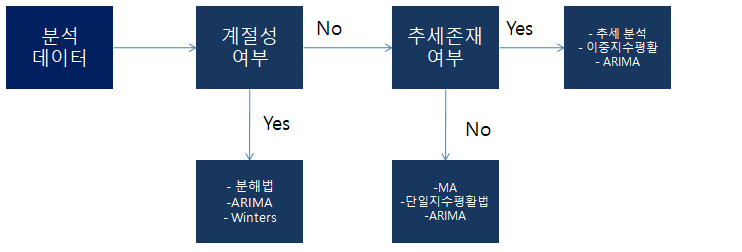

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt 

mpl.rc('font',family='Malgun Gothic')

In [2]:
import statsmodels.tsa.api as tsa

In [4]:
df1 = pd.read_csv('data/81-data11.csv')
df1.shape

(803675, 3)

In [5]:
df1.구매일.max()

'2020-08-07'

In [6]:
df1.isna().sum()

구매일      0
구매금액     0
물품대분류    0
dtype: int64

In [4]:
df1.head()

,구매일,구매금액,물품대분류
0,2018-04-20,57120,기저귀
1,2018-04-20,15900,더블하트
2,2018-04-20,7000,더블하트
3,2018-04-20,20900,더블하트
4,2018-05-06,26500,더블하트


In [5]:
df1['Datetime'] = pd.to_datetime(df1['구매일'])
df1['Year']= df1['Datetime'].dt.year
df1['Month']= df1['Datetime'].dt.month
df1['Day']= df1['Datetime'].dt.day
df1['day_of_week']= df1['Datetime'].dt.day_name()

<AxesSubplot:xlabel='Datetime', ylabel='구매금액'>

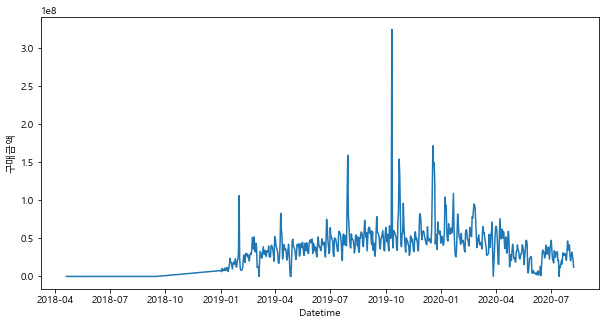

In [6]:
plt.figure(figsize= [10,5])
sns.lineplot(data=df1, x='Datetime' ,y='구매금액', ci=None , estimator=sum)

In [7]:
df1_series = pd.pivot_table(data=df1, index='Datetime', values='구매금액', aggfunc='sum')
df1_series.head()

,구매금액
Datetime,
2018-04-20,100920
2018-05-06,26500
2018-05-14,20600
2018-08-12,75700
2018-09-01,48300


* 특정 주기 단위로 분할

In [8]:
y = df1_series['구매금액'].resample('1W').mean()

* 결측치 처리

In [9]:
y1 = y.fillna( y.mean() )

In [10]:
y1

Datetime
2018-04-22    1.009200e+05
2018-04-29    3.913281e+07
2018-05-06    2.650000e+04
2018-05-13    3.913281e+07
2018-05-20    2.060000e+04
                  ...     
2020-07-12    2.955116e+07
2020-07-19    1.466231e+07
2020-07-26    2.781620e+07
2020-08-02    3.424449e+07
2020-08-09    2.434989e+07
Freq: W-SUN, Name: 구매금액, Length: 121, dtype: float64

In [11]:
y2 = y.fillna( method='ffill' )

In [12]:
y2

Datetime
2018-04-22    1.009200e+05
2018-04-29    1.009200e+05
2018-05-06    2.650000e+04
2018-05-13    2.650000e+04
2018-05-20    2.060000e+04
                  ...     
2020-07-12    2.955116e+07
2020-07-19    1.466231e+07
2020-07-26    2.781620e+07
2020-08-02    3.424449e+07
2020-08-09    2.434989e+07
Freq: W-SUN, Name: 구매금액, Length: 121, dtype: float64

In [13]:
from pylab import rcParams 

In [14]:
rcParams['figure.figsize'] = 15,10

#차트 기본 크기 설정
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['text.color'] = 'k'

* 분해 시계열
    - 시계열에 영향을 주는 일반적 요인을 시계열에서 분리해 분석하는 방법 
    - 계절요인 Seasonal
    - 추세요인 Trend 
    - 순환요인 Cyclical 
    - 불규칙요인 Irregular

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


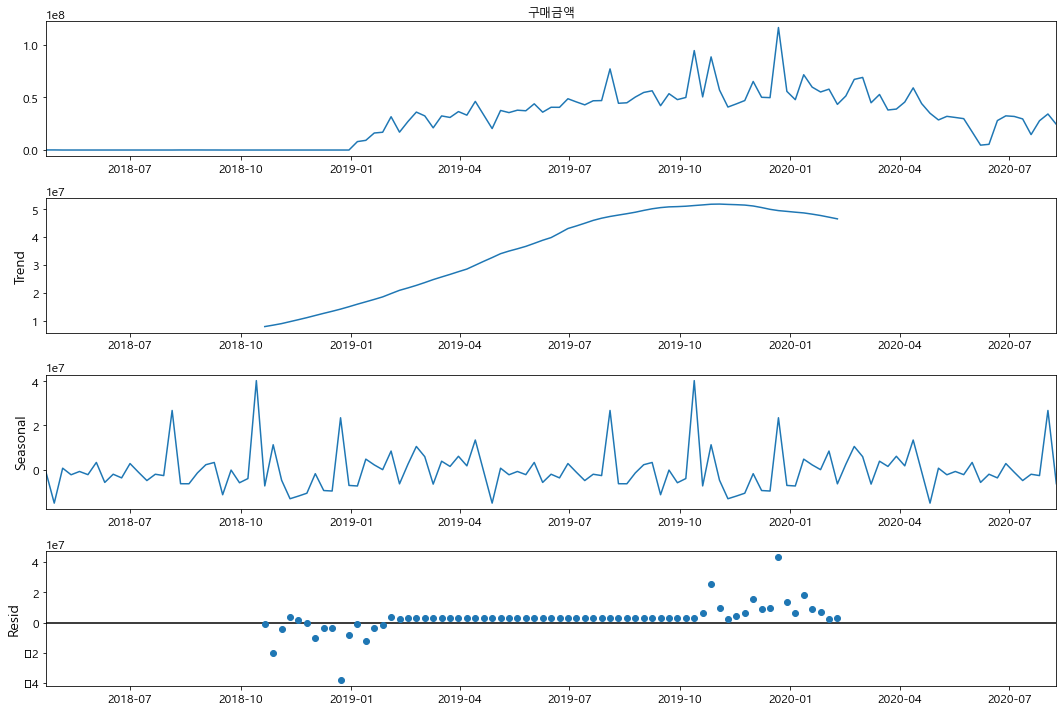

In [15]:
model_series = tsa.seasonal_decompose(y2, model='additive')
fig = model_series.plot()
plt.show()

In [16]:
import itertools # 반복수를 만드는 라이브러리 

In [17]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [18]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [19]:
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [20]:
param_list = []
param_seasonal_list = []
results_AIC_list = []

In [21]:
for param in pdq:
     for param_seasonal in seasonal_pdq:
        try:
            mod = tsa.statespace.SARIMAX(y2,order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            param_list.append(param)
            param_seasonal_list.append(param_seasonal)
            results_AIC_list.append(results.aic)
        except:
             continue

In [22]:
ARIMA_list = pd.DataFrame({'Parameter':param_list,'Seasonal':param_seasonal_list,'AIC':results_AIC_list})
ARIMA_list.to_excel('arima_model_list.xlsx')

- **Likelihood (최대우도) : 특정 데이터가 모수로부터 추출되었을 가능도**
    - 특정 값에 대한 분포의 확률 추정 (연속 확률 밀도 함수 pdf의 y값) 
    
    
- **AIC (Akaike Information Criterion) : 데이터에 대한 모델의 상대적 품질**
    - AIC = -2 ln(L) + 2k 
    - 값이 낮을 수록 모형 적합도가 높은것을 의미 
    
    
- **BIC (Bayes Information Criterion)**
    - BIC = -2 ln(L) + log(n)p 
    - 변수가 더 많은 경우,  AIC에 더 많은 패널티를 부여해 계산 
    
    
- **HQIC (Hannan Quinn Information Criterion)**
    - HQIC = -2 ln(L) + 2k ln(ln(n))

In [23]:
ARIMA_list.sort_values(by='AIC').head(2)

,Parameter,Seasonal,AIC
27,"(0, 1, 1)","(0, 1, 1, 12)",3366.436238
31,"(0, 1, 1)","(1, 1, 1, 12)",3368.101408


In [24]:
mod = tsa.statespace.SARIMAX(y2,order=(0, 1, 1),seasonal_order=(0, 1, 1, 12),
                              enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               구매금액   No. Observations:                  121
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1680.218
Date:                            Tue, 10 Aug 2021   AIC                           3366.436
Time:                                    11:57:04   BIC                           3374.066
Sample:                                04-22-2018   HQIC                          3369.518
                                     - 08-09-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6723      0.131     -5.113      0.000      -0.930      -0.415
ma.S.L12      -0.9497      0.096   

- Order (p,d,q), Seasonal Order (P,D,Q,M)
    - p : AR에서의 p값 (p 구간 내 데이터 사이의 상관관계)
    - d : 차분 
    - q : q MA PACF 편상관계수 q 값 
    - P 
    - D 
    - Q
    - M 
    
- Ljung - Box Test : 일정 기간동안 관측치가 랜덤이고, 독립적인지 여부를 검정 
    - 귀무 : 데이터가 상관관계를 나타내지 않는다. 
    - 대립 : 데이터가 상관관계를 나타낸다. 
    - P.value(귀무가설이 참일 확률) < 0.05 (유의수준) -> 대립가설 참  
    
- Jarque Bera Test : 왜도와 첨도가 정규분포와 일치하는지 가설검정 
    - SARIMAX : 잔차의 분포가 정규분포 인가 
    - 귀무 가설 : 해당 잔차(residual)는 정규분포와 일치한다.
    - 대립 가설 : 해당 잔차(residual)는 정규분포와 일치하지 않는다. 
    - P.value < 0.05 , 해당 잔차(residual)는 정규분포와 일치하지 않는다.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


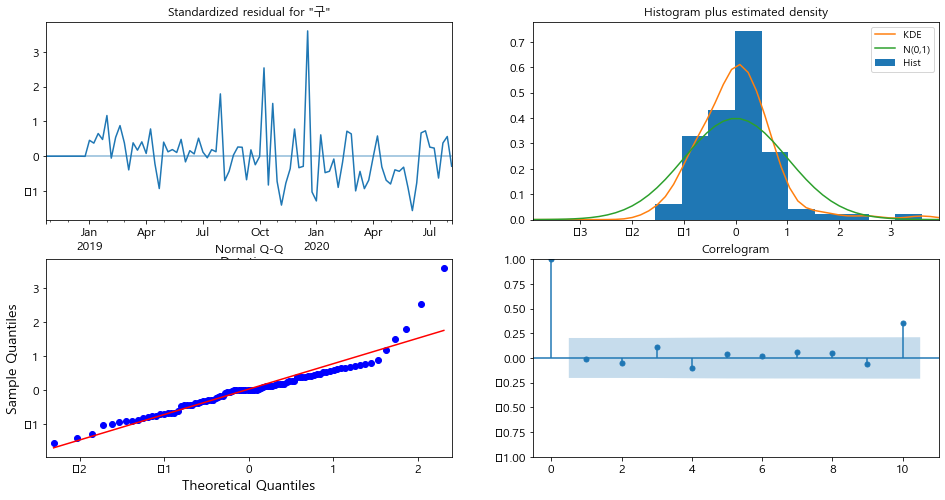

In [25]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [26]:
results.get_prediction()

In [27]:
y2.head()

Datetime
2018-04-22    100920.0
2018-04-29    100920.0
2018-05-06     26500.0
2018-05-13     26500.0
2018-05-20     20600.0
Freq: W-SUN, Name: 구매금액, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


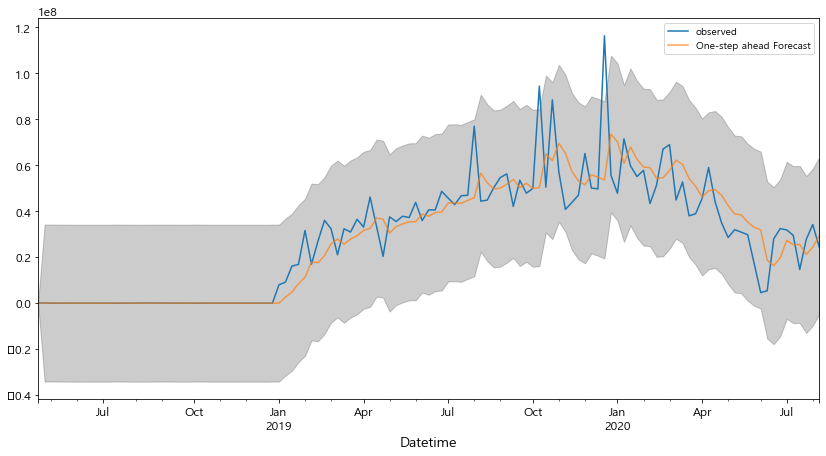

In [28]:
pred = results.get_prediction(start=pd.to_datetime('2018-04-22'), dynamic=False)
pred_ci = pred.conf_int()

ax = y2.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.2)

plt.legend()
plt.show()

In [29]:
pred = results.get_prediction(start=pd.to_datetime('2018-04-22'), dynamic=False)
pd.DataFrame(pred.predicted_mean).reset_index()

,Datetime,predicted_mean
0,2018-04-22,0.000000e+00
1,2018-04-29,1.009200e+05
2,2018-05-06,1.009200e+05
3,2018-05-13,7.653510e+04
4,2018-05-20,6.014030e+04
...,...,...
116,2020-07-12,2.548850e+07
117,2020-07-19,2.560602e+07
118,2020-07-26,2.121060e+07
119,2020-08-02,2.437461e+07


In [30]:
y_forecasted = pred.predicted_mean
y_truth = y['2018-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('MSE {}'.format(round(mse, 2)))

MSE 179159545834941.9


In [33]:
pred_uc = results.get_forecast(steps=50)


In [35]:
pred_uc.predicted_mean

2020-08-16    2.697821e+07
2020-08-23    2.591803e+07
2020-08-30    2.907927e+07
2020-09-06    2.516438e+07
2020-09-13    2.810287e+07
2020-09-20    2.796149e+07
2020-09-27    3.120554e+07
2020-10-04    2.789200e+07
2020-10-11    2.599019e+07
2020-10-18    2.588329e+07
2020-10-25    2.715605e+07
2020-11-01    2.833677e+07
2020-11-08    2.775578e+07
2020-11-15    2.669560e+07
2020-11-22    2.985684e+07
2020-11-29    2.594195e+07
2020-12-06    2.888044e+07
2020-12-13    2.873906e+07
2020-12-20    3.198311e+07
2020-12-27    2.866957e+07
2021-01-03    2.676776e+07
2021-01-10    2.666086e+07
2021-01-17    2.793362e+07
2021-01-24    2.911434e+07
2021-01-31    2.853335e+07
2021-02-07    2.747317e+07
2021-02-14    3.063441e+07
2021-02-21    2.671953e+07
2021-02-28    2.965801e+07
2021-03-07    2.951663e+07
2021-03-14    3.276068e+07
2021-03-21    2.944714e+07
2021-03-28    2.754533e+07
2021-04-04    2.743843e+07
2021-04-11    2.871119e+07
2021-04-18    2.989191e+07
2021-04-25    2.931092e+07
2

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


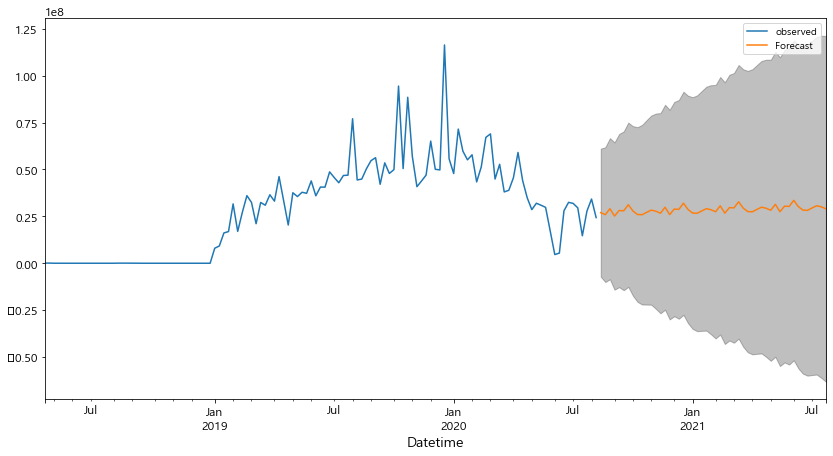

In [31]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int() #추정된 계수의 신뢰구간 계산
ax = y2.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                 pred_ci.iloc[:, 0],
                 pred_ci.iloc[:, 1], color='k', alpha=.25)

plt.legend()
plt.show()

In [32]:
print('Done')

Done
